In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\india\\Downloads\\spam.csv", encoding="latin-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


DATA CLEANING

In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [8]:
df.sample(5)

,v1,v2
4893,ham,Convey my regards to him
661,ham,Then mum's repent how?
4445,ham,Merry christmas to u too annie!
5001,ham,You still around? Looking to pick up later
537,ham,Or maybe my fat fingers just press all these b...


In [9]:
# renaming columns name
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [10]:
df.sample(5)

,target,text
316,ham,Hmmm... Guess we can go 4 kb n power yoga... H...
124,ham,ÌÏ predict wat time Ì_'ll finish buying?
2026,ham,"Nah man, my car is meant to be crammed full of..."
2729,spam,Urgent! Please call 09066612661 from your land...
2632,ham,I WILL CAL YOU SIR. In meeting


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [12]:
df.sample(6)

,target,text
5234,0,Ok cool. See ya then.
4364,0,Ujhhhhhhh computer shipped out with address to...
2531,0,What's happening with you. Have you gotten a j...
334,1,Valentines Day Special! Win over å£1000 in our...
561,0,Thanx 4 e brownie it's v nice...
237,0,Where are you?when wil you reach here?


In [13]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicate
df = df.drop_duplicates(keep="first")

In [16]:
df.shape

(5169, 2)

EDA

In [17]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

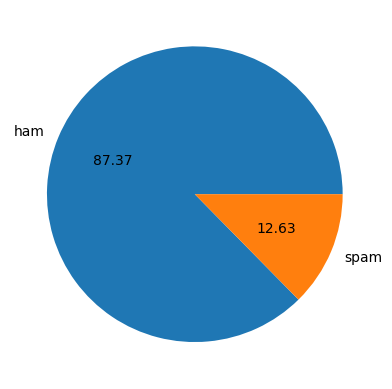

In [18]:
import matplotlib.pyplot as plt

plt.pie(df["target"].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [19]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\india\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
df["num_characters"] = df["text"].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of word
df["num_word"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[["num_characters","num_sentences","num_word"]].describe()

,num_characters,num_sentences,num_word
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [27]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

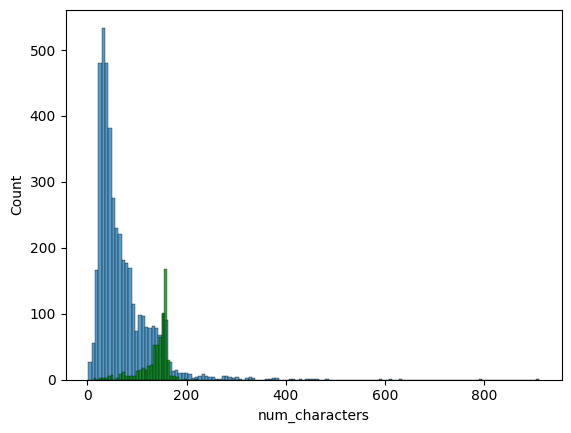

In [28]:
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color="green")

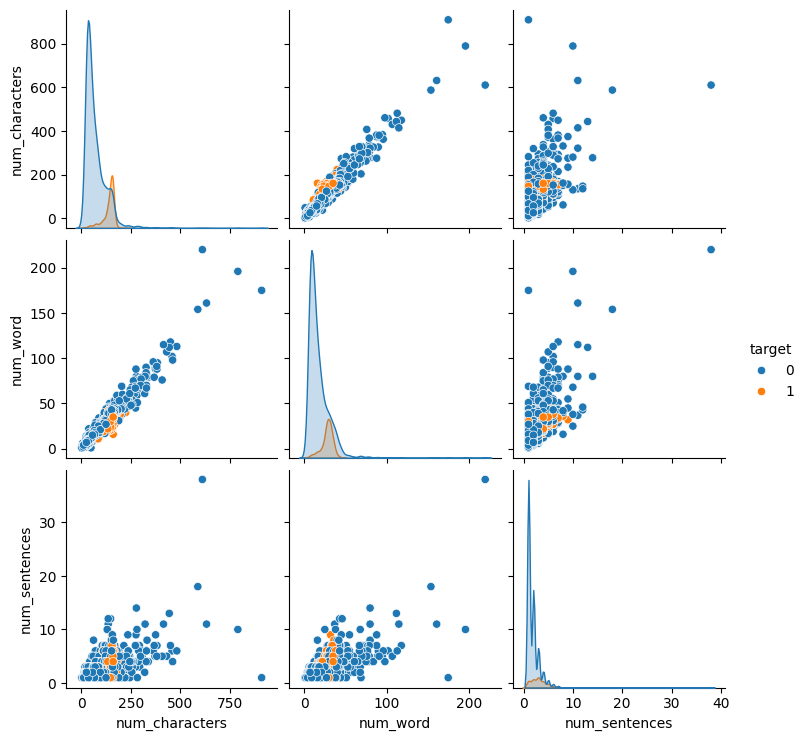

In [29]:
sns.pairplot(df,hue="target")

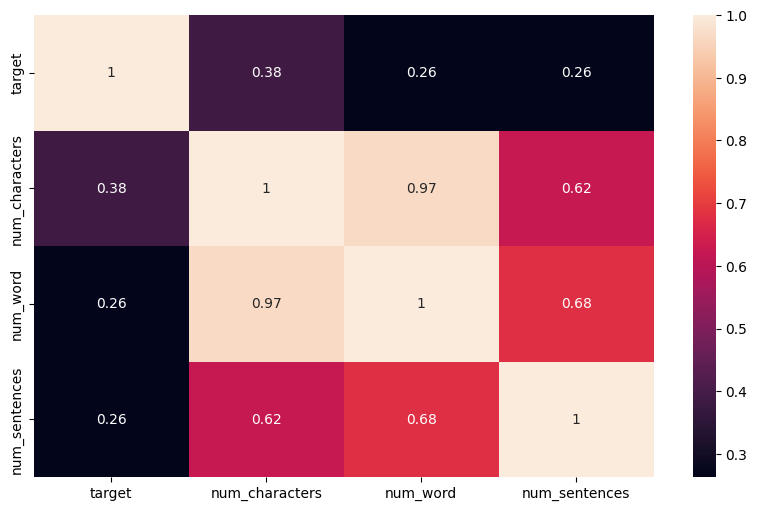

In [30]:
new_df = df[["target","num_characters","num_word","num_sentences"]]
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

In [31]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


DATA  PREPROCESSING

1) Lower case
2) Tokenization
3) Removing special characters
4) Removing stop words and punctution
5) Stemming

In [32]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
# check the text after apply data preprocessing
print(transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."))

gon na home soon want talk stuff anymor tonight k cri enough today


In [34]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [35]:
df["transform_text"] = df["text"].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000,min_font_size=10,background_color="white")

In [38]:
spam_wc = wc.generate(df[df["target"]==1]["transform_text"].str.cat(sep=" "))

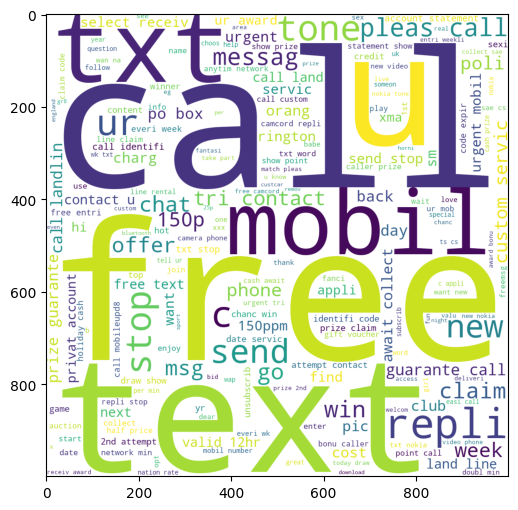

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df["target"]==0]["transform_text"].str.cat(sep=" "))

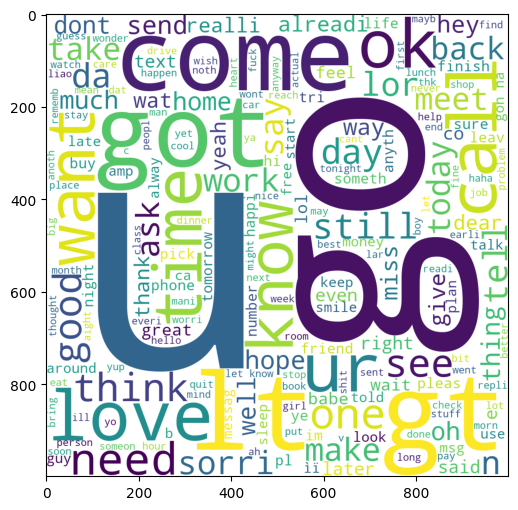

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [42]:
spam_corpus = []
for msg in df[df["target"]==1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

In [44]:
# from collections import Counter
# # data =pd.DataFrame(Counter(spam_corpus).most_common(30))
# # data.rename(columns={0:"x", 1:"y"}, inplace=True)
# y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
# x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

In [45]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30)[1]))
# plt.xticks(rotation="vertical")
# plt.show()

In [46]:
ham_corpus = []
for msg in df[df["target"]== 0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35404

In [48]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30)[1]))
# plt.xticks(rotation="vertical")
# plt.show()

In [49]:
df.head()

,target,text,num_characters,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Model Building

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# tv =TfidfVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)
# cv = CountVectorizer()


In [51]:
# x =cv.fit_transform(df["transform_text"]).toarray()
# a =tv.fit_transform(df["transform_text"]).toarray()
x =Tfidf.fit_transform(df["transform_text"]).toarray()

In [52]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [53]:
y = df["target"].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
et = ExtraTreesClassifier(n_estimators=50, random_state=2, n_jobs=-1)

In [57]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8626692456479691
[[771 118]
 [ 24 121]]
0.5062761506276151


In [65]:
models = [("mnb",mnb),("et",et)]

Voting Classifier

In [67]:
vc = VotingClassifier(estimators=models, verbose=True)
vcr = VotingClassifier(estimators=models, verbose=True, voting="soft")

print("Model --> VotingClassifier for hard")
vc.fit(x_train, y_train)
y_pred2 = vc.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

print(".."*30)

print("Model --> VotingClassifier for soft")
vcr.fit(x_train, y_train)
y_pred2 = vcr.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

Model --> VotingClassifier for hard
[Voting] ...................... (1 of 2) Processing mnb, total=   0.2s
[Voting] ....................... (2 of 2) Processing et, total=  42.5s
0.9690522243713733
[[889   0]
 [ 32 113]]
1.0
............................................................
Model --> VotingClassifier for soft
[Voting] ...................... (1 of 2) Processing mnb, total=   0.2s
[Voting] ....................... (2 of 2) Processing et, total=  44.2s
0.97678916827853
[[888   1]
 [ 23 122]]
0.991869918699187


Bagging Classifier

In [70]:
bag = BaggingClassifier(
    estimator=mnb,
    n_estimators=300,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

bagc = BaggingClassifier(
    estimator=mnb,
    n_estimators=300,
    max_samples=0.25,
    bootstrap=False,
    random_state=42
)


print("Model --> BaggingClassifier for bootstrap True")
bag.fit(x_train, y_train)
y_pred2 = bag.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

print()
print(".."*30)
print()

print("Model --> BaggingClassifier for  bootstrap False")
bagc.fit(x_train, y_train)
y_pred2 = bagc.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

Model --> BaggingClassifier for bootstrap True
0.9119922630560928
[[889   0]
 [ 91  54]]
1.0

............................................................

Model --> BaggingClassifier for  bootstrap False
0.913926499032882
[[889   0]
 [ 89  56]]
1.0


In [59]:
print("Model --> MultinomialNB")
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

print("."*30)

print("Model --> ExtraTreesClassifier")
et.fit(x_train, y_train)
y_pred2 = et.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

Model --> MultinomialNB
0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622
..............................
Model --> ExtraTreesClassifier
0.9796905222437138
[[889   0]
 [ 21 124]]
1.0


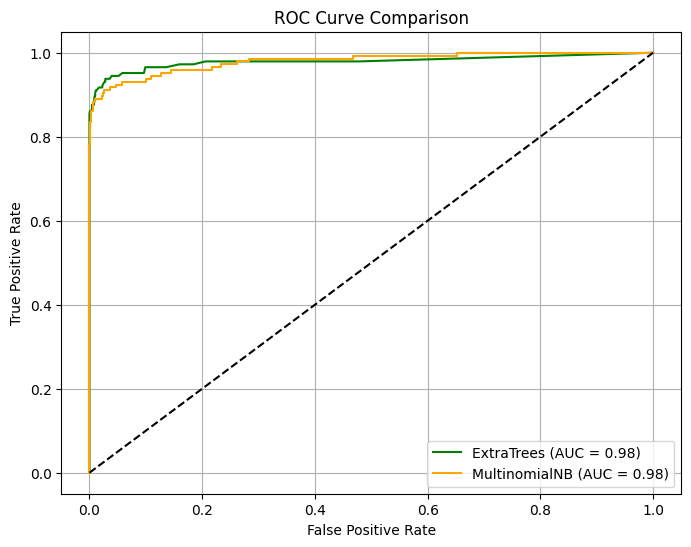

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For ExtraTreesClassifier
y_prob_et = et.predict_proba(x_test)[:, 1]  # Get probability for class 1
fpr_et, tpr_et, _ = roc_curve(y_test, y_prob_et)
roc_auc_et = auc(fpr_et, tpr_et)

# For MultinomialNB
y_prob_mnb = mnb.predict_proba(x_test)[:, 1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Plot both
plt.figure(figsize=(8, 6))
plt.plot(fpr_et, tpr_et, label=f'ExtraTrees (AUC = {roc_auc_et:.2f})', color='green')
plt.plot(fpr_mnb, tpr_mnb, label=f'MultinomialNB (AUC = {roc_auc_mnb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [99]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [101]:
svc= SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc =  BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb =XGBClassifier(n_estimators=50, random_state=2)


In [102]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb
}

In [103]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [104]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9477611940298507)

In [105]:
accuracy_list = []
precision_list = []


for name, clf in clfs.items():
    # Call the train_classifier function 
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    # Print classifier name and metrics
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    # Append results to lists
    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)



For SVC
Accuracy -  0.9758220502901354
Precision -  0.9477611940298507
For KN
Accuracy -  0.9158607350096711
Precision -  1.0
For NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For DT
Accuracy -  0.9313346228239845
Precision -  0.8135593220338984
For LR
Accuracy -  0.9468085106382979
Precision -  0.8629032258064516
For RF
Accuracy -  0.971953578336557
Precision -  0.9915254237288136
For AdaBoost
Accuracy -  0.913926499032882
Precision -  0.7916666666666666
For BgC
Accuracy -  0.960348162475822
Precision -  0.8768115942028986
For ETC
Accuracy -  0.9796905222437138
Precision -  1.0
For GBDT
Accuracy -  0.9497098646034816
Precision -  0.9514563106796117
For xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [88]:
performance_df = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy": accuracy_list,
    "Precision": precision_list
}).sort_values("Precision", ascending=False)

performance_df



,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,xgb,0.974855,0.961240
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
3,DT,0.935203,0.814516


In [108]:
temp_df = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy_max_ft_3000": accuracy_list,
    "Precision_max_ft_3000": precision_list
})
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.947761
1,KN,0.915861,1.000000
2,NB,0.972921,0.991597
3,DT,0.931335,0.813559
4,LR,0.946809,0.862903
5,RF,0.971954,0.991525
6,AdaBoost,0.913926,0.791667
7,BgC,0.960348,0.876812
8,ETC,0.979691,1.000000
9,GBDT,0.949710,0.951456


In [111]:
dataset = performance_df.merge(temp_df, on= "Algorithm")

In [115]:
dataset.head(4).sort_values("Precision_max_ft_3000", ascending=False)

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.896518,1.000000,0.915861,1.000000
1,ETC,0.973888,0.991667,0.979691,1.000000
3,NB,0.961315,0.990654,0.972921,0.991597
2,RF,0.970019,0.991379,0.971954,0.991525


In [185]:
import pickle
pickle.dump(Tfidf,open("Vectorizer.pkl","wb"))
pickle.dump(mnb,open("MultinomialNB.pkl","wb"))
pickle.dump(et,open("ExtraTreesClassifier.pkl","wb"))